Fully connected nodes (1-dimensional)

In [25]:
import random
import numpy as np
row = 20
col = 20
x = np.array([random.randint(1, 100) for _ in range(col)])
print(x)

[ 61  15  93  90  60  14  77   9  45  32  38   4  38  87  76  69  46  11
   6 100]


In [26]:
n = len(x)
avg = 0
for i in range(n):
    avg += 1 / n * x[i]
print(avg)

48.54999999999999


Fully connected doubly stochastic matrix

In [27]:
random_matrix = np.array([[random.randint(1, 100) for _ in range(col)] for _ in range(col)])
random_matrix = random_matrix.astype(np.float64)  # Convert to np.float64

# Sinkhorn-Knopp algorithm
def make_doubly_stochastic(matrix, tol=1e-20):
    if np.allclose(matrix.sum(axis=1), 1, atol=tol) and np.allclose(matrix.sum(axis=0), 1, atol=tol):
        return matrix
    # Normalize rows
    matrix /= matrix.sum(axis=1, keepdims=True)
    # Normalize columns
    matrix /= matrix.sum(axis=0, keepdims=True)
    # Check for convergence
    make_doubly_stochastic(matrix, tol=tol)
    return matrix


doubly_stochastic_matrix = make_doubly_stochastic(random_matrix)


print(doubly_stochastic_matrix)


print("Row sums:", doubly_stochastic_matrix.sum(axis=1))
print("Column sums:", doubly_stochastic_matrix.sum(axis=0))

[[0.08370526 0.10492681 0.07936086 0.03583074 0.01961794 0.09877642
  0.01176994 0.01813277 0.01187892 0.02817349 0.06500107 0.05975725
  0.03512091 0.07847271 0.00209631 0.09211075 0.00928714 0.01148973
  0.07910825 0.07538318]
 [0.05945889 0.00231356 0.10365883 0.04159563 0.00681283 0.06086267
  0.01926923 0.07610455 0.09075566 0.08691208 0.03125531 0.08592327
  0.09520841 0.00645434 0.05615967 0.08096914 0.01658672 0.04719719
  0.02586934 0.00663686]
 [0.02167822 0.04133168 0.04454193 0.06804998 0.01862927 0.0236372
  0.04582478 0.01859645 0.0992663  0.06712732 0.01481406 0.10733591
  0.01715191 0.05647676 0.05255341 0.01476034 0.05556033 0.11914468
  0.04697737 0.06654299]
 [0.08008431 0.08468448 0.02229172 0.07571343 0.06261342 0.04402752
  0.03206013 0.07004661 0.02745441 0.10528208 0.06042205 0.00702255
  0.00372724 0.06034142 0.03633718 0.06557625 0.02529724 0.00910454
  0.03641965 0.09149425]
 [0.08550547 0.11376926 0.00367162 0.00246814 0.09797263 0.02857695
  0.07904822 0.00

In [28]:
y = np.array([[0 for _ in range(col)] for _ in range(row)])
y = y.astype(np.float64)
x = x.astype(np.float64)
print(x)
print(sum(x) / col)
for i in range(row):
    for j in range(col):
        for k in range(col):
            if i == 0: # This is the first row
                y[i][j] += random_matrix[j][k] * (x[k])
            y[i][j] += random_matrix[j][k] * y[i-1][k]
print(y)

[ 61.  15.  93.  90.  60.  14.  77.   9.  45.  32.  38.   4.  38.  87.
  76.  69.  46.  11.   6. 100.]
48.55
[[48.3030935  45.00719128 46.34143647 52.75308305 42.31461185 48.58631394
  57.03646566 50.46047402 51.05963654 46.48015083 43.63234521 37.68590535
  47.03901906 58.64066212 54.43323908 52.15041097 50.84666681 46.01920959
  47.95338446 44.25670019]
 [47.85552503 48.12047202 48.18489948 48.66751177 47.99374386 48.15229287
  48.29019823 48.10638864 49.01784375 48.63259892 47.77783078 48.4637698
  49.14837712 49.49260887 49.67704973 49.48013303 49.07149395 48.72960901
  48.52165131 47.61600184]
 [48.43057776 48.63814702 48.62369129 48.43072524 48.5291828  48.4948164
  48.51126377 48.55220968 48.52687908 48.55857249 48.52147018 48.6241868
  48.64305125 48.64007128 48.62954246 48.64209308 48.48622361 48.58345362
  48.42370343 48.51013876]
 [48.55290124 48.56438789 48.55273664 48.5399372  48.54308644 48.5371644
  48.55209143 48.55920344 48.54379777 48.55340362 48.55458358 48.54977898


Erdos-Renyi newtwork

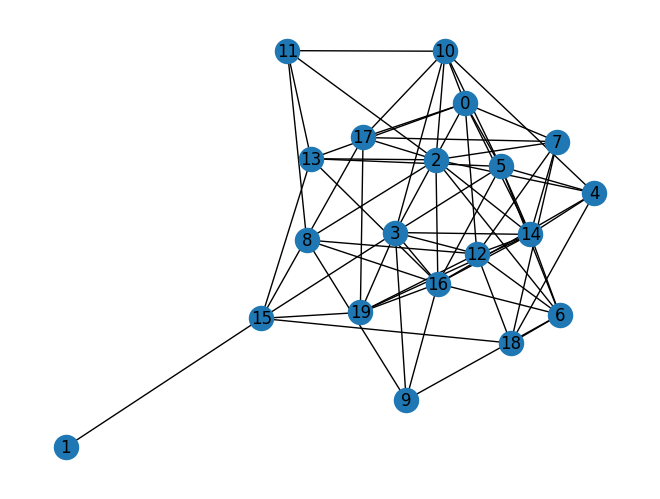

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.erdos_renyi_graph(col, 0.3)
nx.draw(G, with_labels=True)
plt.show()

In [30]:
adjacency_matrix = nx.to_numpy_matrix(G)
print(adjacency_matrix)
adjacency_matrix = adjacency_matrix.astype(np.float64)

[[0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.

In [31]:
weighted_adjacency_matrix = np.array([[random.randint(1, 100) for i in range(col)] for j in range(col)])
weighted_adjacency_matrix = weighted_adjacency_matrix.astype(np.float64)
for i in range(col):
    for j in range(col):
        temp = adjacency_matrix[i, j]
        if temp == 0:
            weighted_adjacency_matrix[i][j] = 0
print(weighted_adjacency_matrix)

[[ 0.  0.  0. 48.  0. 51.  0. 37.  0.  0.  9.  0. 29. 64. 68.  0.  0.  5.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 72.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. 62.  0. 87. 84. 57.  0. 85.  6.  0. 80. 78.  0. 35. 28.
   0.  0.]
 [ 6.  0.  0.  0.  0. 19.  0.  0.  0. 94.  8.  0. 17.  0. 62. 93. 31.  0.
   0. 50.]
 [ 0.  0. 26.  0.  0. 30.  0.  0.  0.  0. 56.  0.  0.  0.  4.  0. 62.  0.
  91.  0.]
 [95.  0.  0. 52. 62.  0. 95.  0.  0.  0. 86.  0.  0.  7. 36.  0. 79.  0.
   0.  0.]
 [ 0.  0. 49.  0.  0. 69.  0.  0.  0. 85.  0.  0. 32.  0. 48.  0. 20.  0.
  11.  0.]
 [75.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0. 87.  0. 60.  0.  0. 37.
  18.  0.]
 [ 0.  0. 43.  0.  0.  0.  0.  0.  0.  6.  0.  6. 10.  0.  0.  0. 19.  0.
   0.  0.]
 [ 0.  0.  0. 50.  0.  0.  7.  0. 51.  0.  0.  0.  0.  0.  0.  0. 58.  0.
   0.  0.]
 [92.  0. 70. 41. 53. 93.  0.  0.  0.  0.  0. 39.  0.  0.  0.  0.  0. 56.
   0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0. 50.  0. 77.  0.  0. 87.  0.  0.

In [32]:
row_sums2 = weighted_adjacency_matrix.sum(axis=1,keepdims=True)
print(row_sums2)
weighted_adjacency_matrix = weighted_adjacency_matrix / row_sums2
print(weighted_adjacency_matrix)

[[311.]
 [ 72.]
 [602.]
 [380.]
 [269.]
 [512.]
 [314.]
 [285.]
 [ 84.]
 [166.]
 [444.]
 [219.]
 [454.]
 [313.]
 [420.]
 [314.]
 [403.]
 [349.]
 [241.]
 [237.]]
[[0.         0.         0.         0.15434084 0.         0.16398714
  0.         0.11897106 0.         0.         0.02893891 0.
  0.09324759 0.20578778 0.21864952 0.         0.         0.01607717
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.10299003 0.
  0.14451827 0.13953488 0.09468439 0.         0.14119601 0.00996678
  0.         0.13289037 0.12956811 0.         0.05813953 0.04651163
  0.         0.        ]
 [0.01578947 0.         0.         0.         0.         0.05
  0.         0.         0.         0.24736842 0.02105263 0.
  0.04473684 0.         0.16315789 0.24473684 0.08157895 0.
  0.      

In [33]:
y = np.array([[0 for _ in range(col)] for _ in range(row)])
y = y.astype(np.float64)
x = x.astype(np.float64)
print(x)
# print(sum(x) / col)
for i in range(row):
    for j in range(col):
        for k in range(col):
            if i == 0: # This is the first row
                y[i][j] += weighted_adjacency_matrix[j, k] * (x[k])
            y[i][j] += weighted_adjacency_matrix[j, k] * y[i-1][k]
print(y)

[ 61.  15.  93.  90.  60.  14.  77.   9.  45.  32.  38.   4.  38.  87.
  76.  69.  46.  11.   6. 100.]
[[56.59807074 69.         52.82392027 58.27631579 32.22304833 62.02539062
  44.88216561 48.07017544 65.10714286 60.25301205 47.44594595 60.3196347
  53.05286344 39.61661342 50.66190476 37.4044586  63.5955335  52.75071633
  40.63485477 57.78481013]
 [51.28272504 37.4044586  47.95718251 52.4833553  51.05761747 50.53586569
  56.80887644 52.65250513 56.35366932 61.66865167 54.22683476 48.4906847
  54.0618874  59.26750018 53.19410687 57.85860779 47.59635604 46.84268137
  46.76998279 52.75547747]
 [53.84257822 57.85860779 54.00522769 55.81511547 49.14306468 52.57204915
  53.59365136 51.57870651 49.61981554 52.14732341 49.88073681 56.57172681
  53.37125219 49.67587745 51.83614432 46.0052062  55.45065217 53.61496427
  54.48387141 51.95887106]
 [52.21091295 46.0052062  51.34390827 50.893076   53.44957608 52.81225596
  52.90000211 53.29181105 54.30730958 53.6907214  53.43428201 49.83394972
  52

In [34]:
y = np.zeros((col), dtype=np.float64)  # y stores the values of each node
x = x.astype(np.float64)  # Initial vector
tolerance = 1e-10  # Tolerance 
max_iterations = 1000  
iteration = 0  

print(x)

consensus_reached = False
while not consensus_reached:
    iteration += 1
    y_new = np.zeros(col, dtype=np.float64)  

    for j in range(col):
        for k in range(col):
            if iteration == 1:  
                y_new[j] += weighted_adjacency_matrix[j, k] * x[k]
            else: 
                y_new[j] += weighted_adjacency_matrix[j, k] * y[k]

    # Check if consensus is reached (strict consensus: all n
    if np.allclose(y_new, y_new[0], atol=tolerance):  # All values equal to the first node's value
        consensus_reached = True

    y = y_new

    if iteration >= max_iterations:
        print("Maximum number of iterations reached.")
        break

print(f"Consensus reached after {iteration} iterations:")
print(y)

[ 61.  15.  93.  90.  60.  14.  77.   9.  45.  32.  38.   4.  38.  87.
  76.  69.  46.  11.   6. 100.]
Consensus reached after 29 iterations:
[52.49406785 52.49436531 52.49407283 52.49417147 52.49408546 52.49407829
 52.49412783 52.49409797 52.49412334 52.49403727 52.49408238 52.49407413
 52.49405442 52.49412181 52.49408781 52.49386353 52.49409241 52.49416091
 52.49411615 52.49413572]
